In [ ]:
Задачи
Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
Сколько транзакций завершились ошибкой?
Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.
Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transaction_data = pd.read_csv('transaction_data.csv')

In [3]:
transaction_data['date'] = pd.to_datetime(transaction_data['date'])

In [4]:
transaction_data.dtypes

date           datetime64[ns]
name                   object
transaction            object
dtype: object

In [5]:
# подсчитываю количество пустых згачений в таблице
transaction_data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [6]:
#выясняю, сколько каких значений встречается в колонке transaction
# быстрый способ
#counts = transaction_data.transaction.value_counts()

In [7]:
#выясняю, сколько каких значений встречается в колонке transaction
# менее быстрый способ
countss = (transaction_data.groupby('transaction', as_index = False)
           .agg({'name': 'count'})
           .rename(columns = {'name': 'counts'})
           .sort_values('counts', ascending = False)
           .reset_index(drop = True))

In [8]:
countss

,transaction,counts
0,successfull,3692
1,cancelled,1619
2,error,4


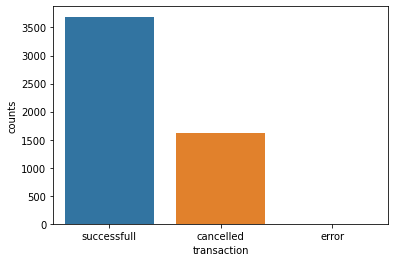

In [9]:
sns.barplot(data = countss, x = 'transaction', y = 'counts', order = ['successfull', 'cancelled', 'error'])

In [10]:
transaction_data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

In [11]:
# нахожу, сколько транзакций осуществил каждый из пользователей (транзакции со значением successfull)
succ = transaction_data.query('transaction == "successfull"') \
.groupby('name', as_index = False) \
.agg({'transaction': 'count'}) \
.sort_values('transaction', ascending = False) 

In [12]:
succ.head(10)

,name,transaction
48,Svetlana_Smirnova,82
41,Olga_Smirnova,80
31,Masha_Ozerova,80
43,Svetlana_Ivanova,79
47,Svetlana_Polyanova,78
33,Masha_Polyanova,78
6,Ekaterina_Smirnova,77
22,Lolita_Ivanova,76
9,Irina_Lesnova,76
10,Irina_Ozerova,76


In [13]:
succ.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [14]:
# нахожу долю пользователей, осуществивших такие транзакции
dolya = succ['transaction'].value_counts(normalize=True) * 100
dolya.head()

63    10.714286
62     8.928571
67     7.142857
72     5.357143
76     5.357143
Name: transaction, dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


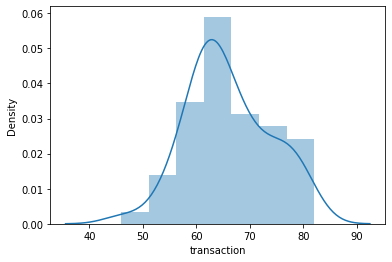

In [15]:
sns.distplot(succ.transaction)

In [16]:
# загружаю обновлёенные данные
upd_trans_data = pd.read_csv('transaction_data_updated.csv')

In [17]:
upd_trans_data

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [18]:
#перевожу столбец с датой из строки во время
upd_trans_data['date'] = pd.to_datetime(upd_trans_data['date'])

In [19]:
upd_trans_data.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [20]:
#minuts = upd_trans_data['date'].dt.minute

In [21]:
# создаю сводную таблицу, где:
# столбцы – имена пользователей
# строки – минута времени осуществления операции (minute)
# значения – число совершённых операций
# Пропущенные значения заполнил нулями
user_vs_minute_pivot = (upd_trans_data.groupby(['name', 'minute'], as_index = False)
                       .agg({'transaction': 'count'})
                       .pivot(index = 'minute', columns = 'name', values = 'transaction')
                       .fillna(0)
                       )

In [22]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [47]:
# получаю время в минутах сначала дня и добавляю в таблицу колонку с полученными результатами
upd_trans_data['true_minute'] = (upd_trans_data['date'].dt.hour) * 60 + upd_trans_data['date'].dt.minute

In [48]:
upd_trans_data

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


In [49]:
# рассчитыыаю количество транзвкций на каждую минуту
user_vs_true_minute = (upd_trans_data.groupby('true_minute', as_index = False)
                       .agg({'transaction': 'count'})
                       .sort_values('transaction', ascending = False))
                       

In [50]:
user_vs_true_minute

,true_minute,transaction
14,14,80
1,1,77
72,72,75
59,59,73
27,27,73
...,...,...
60,60,47
8,8,46
44,44,46
64,64,35


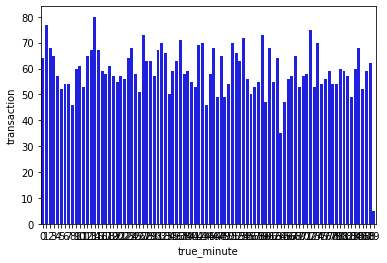

In [51]:
sns.barplot(data = user_vs_true_minute, x = 'true_minute', y = 'transaction', color = 'blue')